<a href="https://colab.research.google.com/github/Kathryn-Hise/2kChickensV1Knight/blob/main/Penguin_vs_Knights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from numpy.core.numeric import zeros_like

In [ ]:
santa0 = 35
peng0 = 200
santaFinal = 0
pengFinal = 11
timeend = 90-22 #seconds

The solver successfully reached the end of the integration interval.
nfev =  32


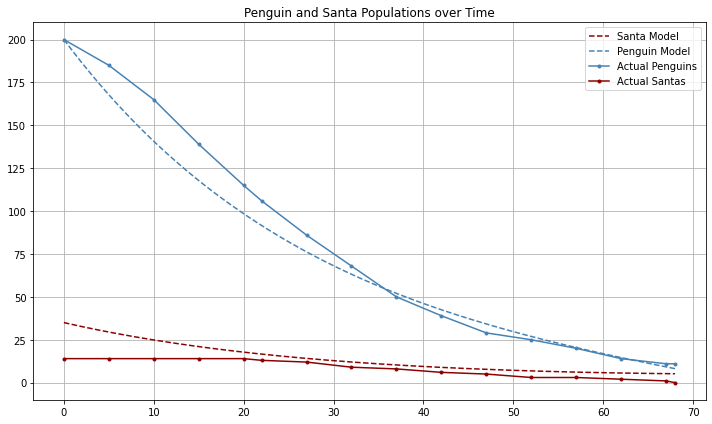

beta = 0.006
alpha = 0.2


In [ ]:
#p1 = santa, p2 = pengbattletime = timeend
penglosses = peng0 - pengFinal 
santalosses = santa0 - santaFinal
beta = 0.006 #santa loss per peng
alpha = 0.2 #peng loss per santa

def f(t,yvec):
  santapop = yvec[0]  # santaica 
  pengpop = yvec[1] #pengan
  return [-beta*pengpop, -alpha*santapop]

def santaloss(t,yvec):
  return yvec[0]

def pengloss(t,yvec):
  return yvec[1]

TMAX = timeend
y0 = [santa0, peng0] 
t = np.linspace(0, TMAX, num=211)
ivp = solve_ivp(f, [0,TMAX],y0, t_eval=t,events=(santaloss,pengloss))
print(ivp.message)
print('nfev = ',ivp.nfev)
#t = ivp.t
santa = ivp.y[0]
peng = ivp.y[1]

#actual
pdata = np.array([200,185,165,139,115,106,86,68,50,39,29,25,20,14,11,11])
sdata = np.array([14,14,14,14,14,13,12,9,8,6,5,3,3,2,1,0])
tdata = np.array([22,27,32,37,42,44,49,54,59,64,69,74,79,84,89,90])
LENloop = len(tdata)
for i in range(LENloop):
  tdata[i] -= 22

plt.figure(figsize=(10,6))
plt.plot(t, santa,'--',color='darkred',label='Santa Model')
plt.title('Penguin and Santa Populations over Time')
plt.plot(t, peng,'r--',color='steelblue',label='Penguin Model')
plt.plot(tdata,pdata,'.-',color='steelblue',label="Actual Penguins")
plt.plot(tdata,sdata,'.-',color='darkred',label='Actual Santas')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
print(f'beta = {beta}')
print(f'alpha = {alpha}')

In [ ]:
#Error Finding
error = 0
error += abs(santa[210] - sdata[15])
error += abs(peng[210] - pdata[15])
error += abs(santa[140] - sdata[10])
error += abs(peng[140] - pdata[10])
error += abs(santa[70] - sdata[5])
error += abs(peng[70] - pdata[5] )
print(error)

31.402890814801097


Lowest Errors so far: 

beta = 0.0019,
alpha = 0.41 : Error 31.402890814801097

beta = 0.0018, 
alpha = 0.40 : Error 33.66666373536682